# ICS 434: DATA SCIENCE FUNDAMENTALS

## Hypothesis Testing:  $\chi^2$ Test, $z$-Test, $t$-Tests

---

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

### The $\chi^2$ Goodness-of-Fit Test

* The $\chi^2$ goodness-of-fit test is one of the oldest hypothesis tests around

* A $\chi^2$ test is a hypothesis testing method
  * Two different flavors
  * The goodness of fit $\chi^2$ tests involve checking if observed frequencies in one or more categories match expected frequencies

* Cateorical data refers to data with a "nominal scale"
  * A scale of measurement used to assign events or objects into discrete categories

### The $\chi^2$ Goodness of Fit Test

* The $\chi^2$ goodness-of-fit test is one of the oldest hypothesis tests around

* The goodness of fit $\chi^2$ tests involve checking if observed frequencies in one or more categories match expected frequencies


### The Card Radnomness Test

* Ask 200 people to mentally choose 2 cards, one after the other, from an imaginary deck of cards, and look at the suit that people chose. Is the choice random?

* Suppose the data for first choice is:

```
clubs   diamonds   hearts   spades 
   35         51       64       50 
```

### How Do We Reprodcude Similar Data?

* The Observed frequncies $O = (O_1, O_2, O_3, O_4) = (35,51,64,50)$

* How do we sample similar data in Python ?
   * Ex. How can you randomly sample 200 observations of 4 events?
   
* Which distribution should we use?
  * Recall, this is simply a generalization of (coin flip)

In [2]:
n = 1
size = 200
prob = [1/4, 1/4, 1/4, 1/4]
np.random.multinomial(200, prob)

array([53, 55, 34, 58])

### The $\chi^2$ Goodness of Fit Test

* Our assumtpion is that the card (categories, or whatever other counts) are not uniformly represented

    * $H_0$: All four suits are chosen with equal probability
    * $H_A$: At least one of the suit-choice probabilities is not 0.25


* How to test this hypothesis?

* Same as the test we had manually run
  * Sample uniformly represented card
  * Compute some test statistics
  * Plot where the observed statistics occurs in the distribution under the null hypothesis 

* This is exactly what the $\chi^2$ goodness of fit tests

 * $H_0$: $P = (.25,.25,.25,.25)$
 * $H_A$: $P \ne (.25,.25,.25,.25)$


### The “Goodness of Fit” Test Statistic

* Similar to what we've done via simulation, if we want to test $H_0$ against $H_A$, we’re going to need a test statistic

  * Measures how “close” the data are to the null hypothesis
  * If the data don’t resemble what you would “expect” to see if the null hypothesis were true, then it probably isn’t true
  * What are the expected frequencies under the null hypothesis?

In [3]:
### What is this called in R?
probabilities = {"clubs": .25, "diamonds": .25, "hearts": .25, "spades": .25}
probabilities

{'clubs': 0.25, 'diamonds': 0.25, 'hearts': 0.25, 'spades': 0.25}

In [4]:
probabilities = pd.Series([0.25, 0.25, 0.25, 0.25], index=["clubs", "diamonds", "hearts", "spades"])

In [5]:
expected = 200 * probabilities
expected

clubs       50.0
diamonds    50.0
hearts      50.0
spades      50.0
dtype: float64

### Compare Expected vs. Observed

* Objetive: Compare the expected ($E_i$) with observed values ($O_i$) in each category.

<img src="images/obs_exp.png">

* Sign should not matter +14 hearts and -15 clubs should be equivalent to -14 hearts and +15 clubs.
  * Easy: we can just count the squared difference.
* We are also interested in contextualizing that difference.
  * +14 with regards to what?
  * Let's divide by the expectation so we can also represent this difference in terms of units representing how far from the expectation it is. 
  * The total distance we are off by is the sum of all of these.


In [6]:
observed = pd.Series([35, 51, 64, 50], index=["clubs", "diamonds", "hearts", "spades"])
observed - expected

clubs      -15.0
diamonds     1.0
hearts      14.0
spades       0.0
dtype: float64

In [7]:
(observed - expected)**2 / expected

clubs       4.50
diamonds    0.02
hearts      3.92
spades      0.00
dtype: float64

In [8]:
### Goodness of fit statistic
sum((observed - expected)**2 / expected)

8.44

### The $\chi^2$ Statistic

* What we computed above is the $\chi^2$ statistic:

$$
\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
$$

$\hspace{0.6in}$ where $k$ is the number of categories
 
* Similar to our simulations with the `tvd` distance, it's easy to observe that large vlaue of $\chi^2$ are in favor of the alternaitves, i.e.:

  * If $\chi^2$ is small, then $O_i$ and $E_i$ are close (null hypothesis is okay)
  * If $\chi^2$ is large, then $O_i$ cannot come from the same distribution as $E_i$ (the uniform here)

* Is $\chi^2 = 8.44$ large or small? 

* Note that the $\chi^2$ goodness of fit test is always a one-sided test

### The Sampling Distribution of the $\chi^2$ Statistic

* What should $\chi^2$ values look like if we sample randomly from the uniform distribution?
  * I.e., what does the sampling distribution of $\chi^2$ looks like under the null hypothesis?

* Recall that, essentially, observed frequency $O_i$ for a category $i$ is distributed according to a binomial
$$
O_i \sim \text{Binomial}(N, P_i)
$$

* For large values of $N$ and when $P_i$ isn’t too close to 0 or 1, the Central Limit Theorem says that the binomial is similar to the Gaussian 


In [9]:
N = 200
p = 0.4

In [10]:
np.random.binomial(N, p)

78

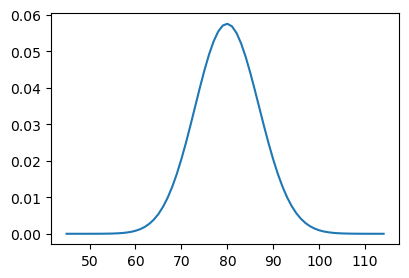

In [11]:
x_axis = np.arange(45, 115)
y_axis = scipy.stats.binom.pmf(x_axis, N, p)

plt.figure(figsize=(4.5, 3))
plt.plot(x_axis, y_axis);

### From Guassian to the $\chi^2$

* According to the central limit theorem, when $E_i = N \times P_i$ is large (i.e., $N$ is large and $P_i$ isn’t too close to 0 or 1), $O_i$ follows a Gaussian

* If $O_i$ is normally distributed, then so is $(O_i - E_i) / \sqrt{E_i}$ since $E_i$ is a constant
  * This represents one of the terms of the statistic (minus the square)

* The test consists of a sum of $k$ terms $(O_i - E_I)^2 / E_i$

* Square and adding a collection of normally distributed variables yields a quantity that has a $\chi^2$ distribution
 * Then $\chi^2$ distribution appears everywhere
  * Recall the sum of residuals discussed last week?
* The parameter of a $\chi^2$ is it's degrees of freedom
 

### From Guassian to the $\chi^2$

* According to the central limit theorem, when $E_i = N \times P_i$ is large (i.e., $N$ is large and $P_i$ isn’t too close to 0 or 1), $O_i$ follows a Gaussian

* If $O_i$ is normally distributed, then so is $(O_i - E_i) / \sqrt{E_i}$ since $E_i$ is a constant
  * This represents one of the terms of the statistic (minus the square)

* The test statistic consists of a sum of $k$ terms $(O_i - E_I)^2 / E_i$

* Square and adding a collection of normally distributed variables yields a quantity that has a $\chi^2$ distribution
 * $\chi^2$ distribution appears in lots of places

* The parameter of a $\chi^2$ distribution is it's degrees of freedom
 

In [12]:
scipy.stats.chi2(df=10).rvs()

16.65397355452538

In [13]:
scipy.stats.chi2(df=100).rvs(4)

array([ 97.67346245,  97.55763868, 100.04992384, 103.82243543])

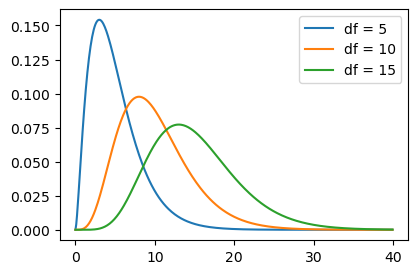

In [14]:
x_axis = np.arange(0, 40, 0.1)
y_axis = scipy.stats.chi2(df=5).pdf(x_axis)
y2_axis = scipy.stats.chi2(df=10).pdf(x_axis)
y3_axis = scipy.stats.chi2(df=15).pdf(x_axis)

plt.figure(figsize=(4.5, 3))
plt.plot(x_axis, y_axis, label="df = 5")
plt.plot(x_axis, y2_axis, label="df = 10")
plt.plot(x_axis, y3_axis, label="df = 15")
plt.legend();

### Degrees of Freedon of the $\chi^2$
* Square and adding a collection of normally distributed variables yields a quantity that has a $\chi^2$ distribution
* We are interested in the number of independent "things" we're adding up
  * Here, only $k-1$ categories are independent
  * Since the values sum to one, then with $k-1$ categories we can infer the value of the last category
  * So the degree os freedom is $k-1$
* The above is an oversimplification
  * “degrees of freedom” is actually a bit of a messy concept
  * degrees of freedom may not even be a whole number
  

### Degrees of Freedon of the $\chi^2$

* Square and adding a collection of normally distributed variables yields a quantity that has a $\chi^2$ distribution

* We are interested in the number of independent "things" we're adding up
  * Here, only $k-1$ categories are independent
  * Since the probabilities sum to one, then with $k-1$ categories we can infer the value of the last category
  * So the degree of freedom is $k-1$
  

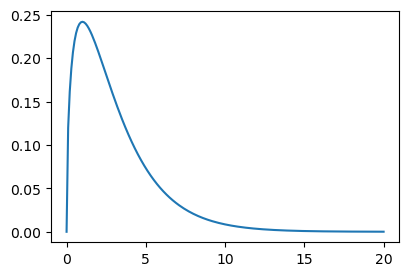

In [15]:
x_axis = np.arange(0, 20.1, 0.1)
y_axis = scipy.stats.chi2(df=3).pdf(x_axis)

plt.figure(figsize=(4.5, 3))
plt.plot(x_axis, y_axis);

### Finding the Rejection Region

* What values of the test statistic (i.e., $\chi^2$ statistic) lead to rejecting the null hypothesis?

* Recall that
  * if $\chi^2$ is small, then $O_i$ and $E_i$ are close (null hypothesis is okay)
  * if $\chi^2$ is large, then $O_i$ cannot come from the same distribution as $E_i$ 
  

In [16]:
chi2_rv = scipy.stats.chi2(df=3)

### The cdf refers to the cumulative distribution function.
### The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x. 

chi2_rv.cdf(0)

0.0

In [17]:
chi2_rv.cdf(20)

0.9998302575644472

In [18]:
print(x_axis[:10])
print(x_axis[-10:])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9 20. ]


In [19]:
probs = chi2_rv.cdf(x_axis)
print(np.round(probs[:10], decimals=4))
print(np.round(probs[-10:], decimals=4))

[0.     0.0082 0.0224 0.04   0.0598 0.0811 0.1036 0.1268 0.1505 0.1746]
[0.9997 0.9998 0.9998 0.9998 0.9998 0.9998 0.9998 0.9998 0.9998 0.9998]


In [20]:
np.where(probs > 0.95)

(array([ 79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
        196, 197, 198, 199, 200], dtype=int64),)

In [21]:
index = np.where(probs > 0.95)[0][0]
index

79

In [22]:
print(x_axis[index])
print(probs[index])

7.9
0.9518757481558399


In [23]:
# ppf (percent point function) is the inverse of the cdf. 
# We can find a critical value using ppf.
# If the test statistic > critical value, reject the null, otherwise retain the null.

chi2_rv.ppf(.95)   # significance level of alpha = 0.05

7.814727903251179

In [24]:
# Give me the area under the upper tail instead
1 - chi2_rv.cdf(8.44)

0.03774185202402136

In [25]:
observed

clubs       35
diamonds    51
hearts      64
spades      50
dtype: int64

In [26]:
# calculate chi-square test
result = scipy.stats.chisquare(observed)
result

Power_divergenceResult(statistic=8.44, pvalue=0.0377418520240214)

In [27]:
observed

clubs       35
diamonds    51
hearts      64
spades      50
dtype: int64

In [28]:
### Specifying different null hypothesis
result = scipy.stats.chisquare(f_obs=observed, f_exp=[40, 50, 60, 50])
result

Power_divergenceResult(statistic=0.9116666666666666, pvalue=0.8226115000538757)

In [29]:
print("chi-squared statistic =", result[0])
print("p-value =", round(result[1], 4))

chi-squared statistic = 0.9116666666666666
p-value = 0.8226


### The $\chi^2$ Test of Independence (or Association)

* Support you would like to know whether a site is more conducive to growth of some coral species
* You conduct a test where you introduce species to sites A and B and observe whether it lives or dies, or is unhealthy



* 180 entries introduced in siteA or siteB 
  * 87 in siteA and 93 in siteB
<img src="images/xtab.png">
* Question: Is the distribution of the data the same across both sites?
  * Are the proportions of `lives`, `dies`, or `unhealthy` the same across both sites?


### Constructing the Hypothesis Test

<img src="images/xtab_generic.png">

* $O_{ij}$ is a count (observed frequency) of the number of respondents that are at a site (siteA for $j=1$ or siteB for $j=2$) which lead to condition $i$ (lives, dies, unhealth)
* The total number of observations is written as $N$
* $R_i$ to denote the row totals
* $C_j$ to denote the column totals 


### Constructing the Hypothesis Test -- Cont'd

* If both sites yield the same outcomes, then probability of dies is equal in both sites
  * by the same token, probability of healthy is also similar in both sites
  * by the same token, probability of lives also similar in both sites

* $H_0$: All of the following are true:
    *  $P_{11}$ = $P_{12}$ (same probability of dies)
    *  $P_{21}$ = $P_{22}$ (same probability of unhealthy)
    *  $P_{31}$ = $P_{32}$ (same probability of lives)
    
* We denote $P_i$, where $i$ in {1, 2, 3} as the probability of `dies`, `unhealthy` or `lives` respectively

### Constructing the Hypothesis Test -- Cont'd

* Unlike goodness of fit test, the null hypothesis doesn’t actually specify a particular value for $P_i$. 
  * We can estimate it from the data
  * If 28 out of 180 spcies died, then the empirical probability is simply 28/180 ( .16)

$$
\hat{P}_i = \frac{R_i}{N}
$$

* Expected frequency is therefore:

$$
\hat{E}_{ij} = \frac{R_i}{N} \times C_j
$$


### Defining the Test Statistic

* Following the exact same strategy that we used in the goodness of fit test
 * Exact same statistic. 
For a contingency table with r rows and c columns, the equation that defines our $\chi^2$ statistic is:

$$
\chi^2 = \sum_{i=1}^{r}\sum_{j=1}^{c}\frac{(\hat{E}_{ij}-O_{ij})^2}{\hat{E}_{ij}}
$$

* For the same reasons as above, this statistic is also distributed accroding to the $\chi^2$ distribution

* How many independet pints are we analyzing

* Here, $df = (r-1)(c-1)$


### Defining the Test Statistic

* Following the exact same strategy that we used in the goodness of fit test
 * For a contingency table with $r$ rows and $c$ columns, the equation that defines our $\chi^2$ statistic is:

$$
\chi^2 = \sum_{i=1}^{r}\sum_{j=1}^{c}\frac{(\hat{E}_{ij}-O_{ij})^2}{\hat{E}_{ij}}
$$

* For the same reasons as earlier, this stat is also distributed accroding to the $\chi^2$ distribution

  * Here, $df = (r-1)(c-1)$


### Effect Size
* As we discussed when we did similar test with simulation, it's common to report some measure of effect size. 
 * Is there a significant effect or are we splitting hairs?
 
* Here several tests can be used. Two most common is Cramer’s _V_.
  
$$  
V = \sqrt{\frac{X^2}{N(k-1)}}  
$$

### Assumptions of the Test

* Expected frequencies are sufficiently large. 
 * Expected frequencies larger than at least 5
   * Assumption needed to approximate the central limit theorem.
  * For larger tables, at least 80% of the the expected frequencies are above 5 and none is 0 
* Data are independent of one another
  * Ex. the fact that a species dies, does not increase the change of another species dying.

### Test of Independence in R
* Also uses chisq.test() function
  Requires a cross-tabulation rather than a simple frequency table
 * Knows you'r asking for a test of independence and not a goodness of fit test
 

### The Fisher Exact Test

* A test of independence used with small data
  * Works somewhat differently to the chi-square test 
  * doesn’t have a test statistic;  calculates the p-value “directly”
* Uses the hypergeometric ditribution to compute the test
  * Same test usually used for assessing enrichment in genomics
  * Given that 20 genes out of 200 are in DNA replication but 10 genes out of the differentially expressed are in DNA replication. Question: is DNA replication enriched.


### McnNemar Test

* Used on 2x2 Contingency tables
 * Used with paired data
 * Example: on before after sort of experiment

* You measure agressiveness of sharks before and after adding a compound to the water and measure how many exhibited predatory behavior

<img src="images/before_after.png">

* Can we use the chi-square to test the independence?


### McnNemar Test -- Cont'd

* We can use the $\chi^2$ test of independence because the data is not independent
  * Each animal shows in the before and after columns
  * Before drug, Animal 1 shows agressiveness while 2 doesn't
  * After drug, Animal 1 has a higher likelihood of showing agressiveness than animal 2.
  


### McnNemar Test -- Cont'd
* Requires re-writing the data to minimize the dependence


<img src="images/mc_nemar.png">

* Same data, but each of the 100 animals appears once in the table 
  * Independence assumption is now satisfied since non of the animal appears twice
  * Still assuming that animal agressiveness is independent (no contagious) 

* Requires computing the $X^2$ test statistic slighly differently  
  * Adjust for table transformation

In [30]:
# load("data/animal_agression.Rdata")
# head(agpp)

In [31]:
# summary(agpp)

In [32]:
# freq_table = xtabs( ~ response_before + response_after, data = agpp)
# freq_table

In [33]:
# mcnemar.test( freq_table)

### McnNemar Test -- Cont'd

* Suppose I wanted to know whether the choice you make the second time is dependent on the choice you
made the first time. 
  * Test of independence

* Suppose I wanted to know if, on average, the frequencies of suit choices were different the second time than the first time. 
  * That's a McNemar Test


In [34]:
# summary(cards)

In [35]:
# card_choices = xtabs( ~ choice_1 + choice_2, data = cards )
# card_choices

In [36]:
# chisq.test( card_choices )

In [37]:
# mcnemar.test(card_choices)

### $t$-Test

* The $t$-test tells you whether the differences between groups is statistically significant.
  * I.e., could the difference have happened by chance?

* Approach very similar to what we covered uisng simulations.

* Used for example to:
  * In a medical context, we might want to know if a new drug increases or decreases blood pressure. 
  * Compare the average transaction value between two companies.


### One Sample $z$-Test

* Average expression of gene $X$ in normal corals is $\mu = 67.5$ with $\sigma=9.5$

* You measure the exrepssion of gene $X$ in 20 survivors of a heat wave and obtain the following values:

<center>50 60 60 64 66 66 67 69 70 74 76 76 77 79 79 79 81 82 82 89 </center>
<br>

* Biologically, we may be interested in evaluating whether the expression of gene $X$ in survivors is different from that in normal corals
  * Perhaps that is the reason those corals survived the heat wave?
  

In [38]:
new_data = [50,60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89]

np.mean(new_data)

72.3

### $z$-Test -- Cont'd

* We are interested in whether there is a difference between the means
  * I.e., the average gene expression in normal corals and the survivors 

* Test statistic: $\bar{X} - \mu$

* If difference is 0, things are looking good for the null hypothesis

* If this quantity is too large or too small then it’s looking less likely that the null hypothesis is true

* How far away from zero should it be for us to reject $H_0$?


### Null vs. Alternative Hypothesis: An Illustration

* $X \sim \mathcal{N}(\mu, \sigma)$

<img src="images/gaussian%20example.png">

### $z$-Score

* If the null hypothesis is true, then the sampling distribution of the mean can be written as follows

$$
\bar{X}\sim \mathcal{N}(\mu, SE(\bar{X}))
$$

$\hspace{0.6in}$ where $SE(\bar{X}) = \sigma/\sqrt{N}$ (the standard error of $\bar{X}$) 

* What we can do is to convert the sample mean $\bar{X}$ into a _standard score_ 

$$
z_{\bar{X}} = \frac{\bar{X} - \mu}{SE(\bar{X})} = \frac{\bar{X} - \mu}{\sigma/\sqrt{N}}
$$

* This $z$-score is our test statistic
  * The $z$-scores has a standard normal distribution: $z_{\bar{X}} \sim \mathcal{N}(0,1)$
  

<img src="images/one_two_test.png">

In [39]:
sample_mean = np.mean(new_data)
sample_mean

72.3

In [40]:
mu_null = 67.5
sd_true = 9.5

In [41]:
N = len(new_data)
sem = sd_true / np.sqrt(N)
z_score = (sample_mean - mu_null) / sem
z_score

2.259605535157681

In [42]:
import scipy.stats
rv_norm = scipy.stats.norm(0, 1)
1 - rv_norm.cdf(z_score)

0.011922871882469877

In [43]:
rv_norm.cdf(-z_score)

0.011922871882469896

In [44]:
rv_norm.cdf(-z_score) + (1 - rv_norm.cdf(z_score))

0.023845743764939774

### Conclusion of $z$-Test for the Example

* With an average expression of 72.3 of gene $X$ in the sample of survivors, and assuming a true population standard deviation of 9.5, we can conclude that the survivors have significantly different statistics scores to the average of normal corals ($z = 2.26, N = 20, p < .05$).

### Assumptions of the $z$-Test

* Normality
  * The $z$-test assumes that the true population distribution is normal 

* Independence
  * The observations in the data are not correlated with each other

* Known standard deviation
  * The true standard deviation of the population is known

### One Sample $t$-Test

* We don't know the population's `std`
  * We need to adjust for the fact that we have some uncertainty about what the true population standard deviation is
  
* If our null hypothesis is that the true mean is $\mu$, but our sample has mean $\bar{X}$ and our estimate of the population standard deviation is $\hat{\sigma}$, then our $t$ statistic is

$$
t = \frac{\bar{X} - \mu}{\hat{\sigma} /\sqrt{N}}
$$

* The sampling distribution turns into a $t$-distribution with $N - 1$ degrees of freedom (df)


In [45]:
result = scipy.stats.ttest_1samp(new_data, popmean=67.5)
result

Ttest_1sampResult(statistic=2.25471286700693, pvalue=0.03614521878144544)

In [46]:
t, p = scipy.stats.ttest_1samp(new_data, popmean=67.5)
t, p

(2.25471286700693, 0.03614521878144544)

In [47]:
# scipy.sta(x=new_data, mu=67.5)

In [48]:
conf_level = 0.95
df = len(new_data) - 1
sample_mean = np.mean(new_data)
sem = scipy.stats.sem(new_data)

conf_interval = scipy.stats.t.interval(conf_level, df, sample_mean, sem)
conf_interval

(67.84421513791415, 76.75578486208585)

### The Independent Samples $t$-Test (Student Test)

* Two independent sets of continuous values

* Are the two independent samples drawn from populations with the same mean (null hyothesis) or different means (alternative hypothesis)?
  * $H_0$: $\mu_1 = \mu_2$
  * $H_A$: $\mu_1 \ne \mu_2$
               
<center><img src="images/independent.png" width="500"></center>


### Pooled Estimate of the Standard Deviation

* We make the assumption that the two groups have the same population standard deviation
  * $\sigma_1$ = $\sigma_2 = \sigma$

* Compute it simply as the weighted average across both samples


### Pooled Estimate of the Standard Deviation

* We make the assumption that the two groups have the same population standard deviation
  * $\sigma_1$ = $\sigma_2 = \sigma$

* Compute the *pooled standard deviation* simply as the weighted average across both samples

$$
\hat\sigma = \sqrt{\frac{\left(N_1 - 1\right)\hat\sigma_1^2 + \left(N_2 - 1\right)\hat\sigma_2^2}{N_1 + N_2 - 2}}
$$

### Test Statistic
$$
t = \frac{\bar{X_1} - \bar{X_2}}{SE(\bar{X_1} - \bar{X_2})}
$$

$\hspace{0.6in}$ where

$$
SE(\bar{X_1} - \bar{X_2})  = \hat{\sigma}\sqrt{\frac{1}{N_1}+ \frac{1}{N_2}}
$$

* The sampling distribution of this $t$-statistic is a $t$-distribution with $N-2$ degrees of freedom

### Assumptions of the Student Test
* Normality
* Independence
* Homogeneity of variance (also called “homoscedasticity”)
  * Population standard deviation is the same in both groups
   * Can be tested using the Levene test

### Assumptions of the Student Test
* Normality
* Independence
* Homogeneity of variance (also called “homoscedasticity”)
  * Population standard deviation is the same in both groups
 

### The Independent Samples $t$-Test (Welch Test)

* Third assumption of Student test rarely holds with real data
  * Both groups may not have the same standard deviation
  * If two samples don’t have the same means, why should we expect them to have the same standard deviation?

* Does not assume homogeneity of variance
  * This leaves only the assumption of normality, and the assumption of independence


### Test Statistic
$$
t = \frac{\bar{X_1} - \bar{X_2}}{SE(\bar{X_1} - \bar{X_2})}
$$

$\hspace{0.6in}$ where

$$
SE(\bar{X_1} - \bar{X_2}) = \sqrt{\frac{\hat{\sigma}_1^2}{N_1}+ \frac{\hat{\sigma}_2^2}{N_2}}
$$


In [49]:
np.random.seed(142)
data_1 = np.random.normal(1, 3, 20)
data_2 = np.random.normal(1, 3, 20)

In [50]:
scipy.stats.ttest_ind(data_1, data_2, equal_var=True)

Ttest_indResult(statistic=0.2526199076931976, pvalue=0.8019234774419112)

In [51]:
scipy.stats.ttest_ind(data_1, data_2, equal_var=False)

Ttest_indResult(statistic=0.2526199076931976, pvalue=0.8022169934426511)

In [52]:
data_1 = np.random.normal(4, 0.8, 20)
data_2 = np.random.normal(1, 1.2, 20)

In [53]:
scipy.stats.ttest_ind(data_1, data_2)

Ttest_indResult(statistic=7.884255396216763, pvalue=1.6178648989867056e-09)

In [54]:
scipy.stats.ttest_ind(data_1, data_2, equal_var=False)

Ttest_indResult(statistic=7.884255396216763, pvalue=3.0754203998087325e-09)

### Checking the Normality of the data

* QQ plots provide a nice way to informally check the normality of your data

* Shapiro-Wilk test provides a formal test
  * $N$ observations are normally distributed


### Testing Non-Normal Data with Wilcoxon Tests


* Like the t-test, the Wilcoxon test comes in two forms, one-sample and two-sample
  * They’re used in more or less the exact same situations as the corresponding t-tests

* Unlike the t-test, the Wilcoxon test doesn’t assume normality
* No assumptions about what kind of distribution is involved
  *  nonparametric tests

* While avoiding
  * Drawback: the Wilcoxon test is usually less powerful than the t-test 
    * May accepts a null hypothesis that is actually false
